# SIMULATION OF NLOS-VLC SYSTEM USING THE ROLLING SHUTTER MECHANISM

### Import the transmitter, surface and camera objects, as well as numpy library.

In [7]:
#Import module Transmitter
from transmitter import Transmitter as Transmitter

from surface import Surface as Surface

from camera import Camera as Camera

from rollingshutter import RollingShutter as RS

import numpy as np


### The trasmitter is defined as a Trasmitter type object from nine input parameters


In [8]:
transmitter = Transmitter(
        "Led1",
        position=[0, 1.5, 3],
        normal=[0, 0, -1],
        mlambert=1,
        wavelengths=[620, 530, 475],
        fwhm=[20, 30, 20],
        modulation='ieee16',
        frequency=2000,
        no_symbols=1000,
        luminous_flux=5000
    )
# transmitter.plot_spd_normalized()
# transmitter.plot_spd_at_1lm()
# transmitter.plot_led_pattern()
print(transmitter)


 List of parameters for LED transmitter: 
Name: Led1
Position [x y z]: [0.0000e+00 0.0000e+00 4.0000e+00] 
Normal Vector [x y z]: [0.0000e+00 0.0000e+00 -1.0000e+00] 
Lambert Number: 1.0 
Central Wavelengths [nm]: [6.2000e+02 5.3000e+02 4.7500e+02] 
FWHM [nm]: [2.0000e+01 3.0000e+01 2.0000e+01]
Luminous Flux [lm]: 5000.0
ILER [W/lm]: 
 [[3.8001e-03 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.8197e-03 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.1960e-02]] 
Average Power per Channel Color: 
 [6.3336e+00 3.0328e+00 1.9934e+01] 
Total Power emmited by the Transmitter [W]: 
 29.300327676935847 



### The surface is defined from eight imputs parametes

In [9]:
surface = Surface(
    name="surfacePlaster",
    position=[0, 4, 0],
    reflectance='plaster',
    vertex1=[-2, 0, -2],
    vertex2=[2, 0, -2],
    vertex3=[2, 0, 2],
    vertex4=[-2, 0, 2]
    )
# surface.plot_reflectance()
surface._group_vertices()
print(surface)


 List of parameters for LED transmitter: 
Name: surfacePlaster
Position [x y z]: [0.0000e+00 4.0000e+00 0.0000e+00] 
Normal Vector [x y z]: [0.0000e+00 -1.0000e+00 0.0000e+00] 
Reflectance Material: plaster 
Area: 16.0 



### The camera is defined from a set of 13 input parameters

Projecting surface onto the image plane...
Calibration matrix (K):
 [[8.9286e+02 0.0000e+00 6.0000e+02]
 [0.0000e+00 8.9286e+02 4.0000e+02]
 [0.0000e+00 0.0000e+00 1.0000e+00]]

Rotation matrix (R):
 [[1.0000e+00 -0.0000e+00 0.0000e+00]
 [-0.0000e+00 -0.0000e+00 1.0000e+00]
 [-0.0000e+00 -1.0000e+00 -0.0000e+00]]

Projection matrix (P):
 [[8.9286e+02 6.0000e+02 -0.0000e+00 -1.2000e+03]
 [-0.0000e+00 4.0000e+02 -8.9286e+02 -8.0000e+02]
 [0.0000e+00 1.0000e+00 -0.0000e+00 -2.0000e+00]]


/home/juanpc/python_phd/rs-vlc-model/./camera-models/camera_models/_frame.py:32: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection="3d")
/home/juanpc/python_phd/rs-vlc-model/./camera-models/camera_models/_principal_axis.py:27: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(proj

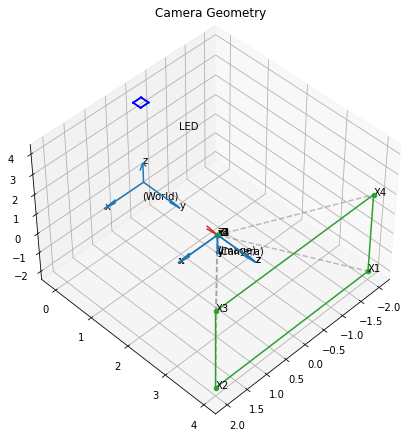


 Projected Points onto image plane:
[[-2.9286e+02 1.2929e+03]
 [1.4929e+03 1.2929e+03]
 [1.4929e+03 -4.9286e+02]
 [-2.9286e+02 -4.9286e+02]
 [-2.9286e+02 1.2929e+03]]
Computing the point's coordinates inside of the projected polygon ...
Pixel's center X (meshgrid):
[5.0000e-01 1.5000e+00 2.5000e+00 ... 1.1975e+03 1.1985e+03 1.1995e+03]
Pixel's center Y  (meshgrid):
[5.0000e-01 1.5000e+00 2.5000e+00 3.5000e+00 4.5000e+00 5.5000e+00
 6.5000e+00 7.5000e+00 8.5000e+00 9.5000e+00 1.0500e+01 1.1500e+01
 1.2500e+01 1.3500e+01 1.4500e+01 1.5500e+01 1.6500e+01 1.7500e+01
 1.8500e+01 1.9500e+01 2.0500e+01 2.1500e+01 2.2500e+01 2.3500e+01
 2.4500e+01 2.5500e+01 2.6500e+01 2.7500e+01 2.8500e+01 2.9500e+01
 3.0500e+01 3.1500e+01 3.2500e+01 3.3500e+01 3.4500e+01 3.5500e+01
 3.6500e+01 3.7500e+01 3.8500e+01 3.9500e+01 4.0500e+01 4.1500e+01
 4.2500e+01 4.3500e+01 4.4500e+01 4.5500e+01 4.6500e+01 4.7500e+01
 4.8500e+01 4.9500e+01 5.0500e+01 5.1500e+01 5.2500e+01 5.3500e+01
 5.4500e+01 5.5500e+01 5.650

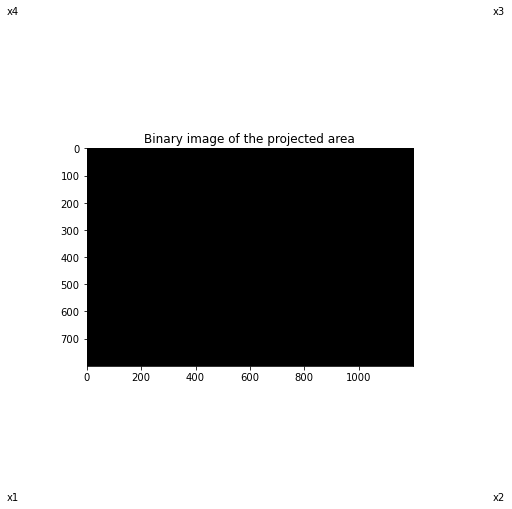

Computing the intersection points with the surface ... 
Computing the irradiance in each pixel inside of polygon...
Computing crosstalk ... 
Crosstalk matrix:
 [[2.9182e-04 8.5387e-06 2.0425e-05]
 [9.7789e-05 1.3620e-04 3.1301e-04]
 [8.7657e-06 2.8187e-05 6.1458e-04]]


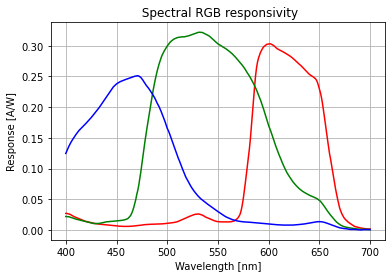

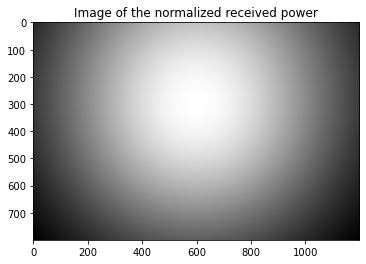

In [10]:
PIXEL_SIZE = 1.12e-6
MX = 1/PIXEL_SIZE  # number of pixels per unit distance in image coordinates in x direction
MY = 1/PIXEL_SIZE  # number of pixels per unit distance in image coordinates in y direction
FOCAL_LENGTH = 3e-3  # focal length
THETA_X = np.pi / 2.0  # roll angle
THETA_Y = np.pi  # pitch angle
THETA_Z = np.pi  # yaw angle
C = np.array([0, 2, 0])  # camera centre
IMAGE_WIDTH = 1200
IMAGE_HEIGTH = 800
PX= IMAGE_WIDTH/(2*MX)  # principal point x-coordinate
PY= IMAGE_HEIGTH/(2*MY)  # principal point y-coordinate

camera = Camera(
    name="camera1",
    focal_length=FOCAL_LENGTH,
    pixel_size=1/MX,
    px=PX,
    py=PY,
    mx=MX,
    my=MY,
    theta_x=THETA_X,
    theta_y=THETA_Y,
    theta_z=THETA_Z,
    centre=C,
    image_height=IMAGE_HEIGTH,
    image_width=IMAGE_WIDTH,    
    surface=surface,
    transmitter=transmitter,
    sensor='SonyStarvisBSI',
    idark=1e-14
)
camera.plot_responsivity()
camera.plot_image_intensity()



### The Rolling Shutter module is added.

Row bins:
[  0  18  44  71  97 123 150 176 203 229 256 282 309 335 362 388 414 441
 467 494 520 547 573 600 626 652 679 705 732 758 785 800]
Maximum value of Bayer image:
66.0159113121469


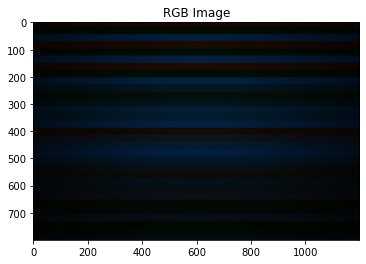

Adding blur effect ...


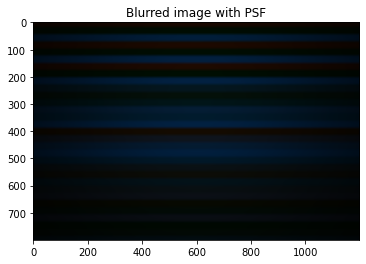

In [11]:
# Library to plot 
import matplotlib.pyplot as plt

camera.idark = 1.9e-23

rollingshutter = RS(
    name="rs",
    t_exposure=350e-6,
    t_rowdelay=18.904e-6,
    t_start=0,
    iso=200,
    adc_resolution=8,
    gain_pixel=2e19,
    transmitter=transmitter,
    camera=camera
)

rollingshutter.plot_color_image()
rollingshutter.add_blur(size=11, center=5.5, sigma=10.5)
rollingshutter.plot_blurred_image()




In [12]:
print(camera._pixel_area)

1.2544000000000002e-12
